## Librerías

In [692]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway,pearsonr, ttest_ind, ttest_rel, shapiro, levene, mannwhitneyu, kruskal, chi2_contingency, normaltest,skew, kurtosis

import re


## Carga de datos

In [693]:
df= pd.read_parquet('/Users/isaromobru/Desktop/DS102024_/ordenadores/train.parquet')

In [694]:
df
df.copy()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.00
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.00
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.00
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.60
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,355.00
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,379.00
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Linux,2.2kg,677.35
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,745.00


In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    object 
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 92.8+ KB


In [696]:
df.shape

(912, 13)

In [697]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [698]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

## Visiones generales de como están compuestas cada variable

In [699]:
df['Company'].value_counts()

Company
Dell         214
Lenovo       206
HP           184
Asus         105
Acer          72
MSI           44
Toshiba       35
Apple         13
Samsung        9
Razer          5
Mediacom       5
Google         3
LG             3
Microsoft      3
Fujitsu        3
Xiaomi         2
Huawei         2
Chuwi          2
Vero           2
Name: count, dtype: int64

In [700]:
df['Product'].value_counts()

Product
XPS 13            21
Inspiron 3567     18
Vostro 3568       14
Inspiron 5570     13
250 G6            13
                  ..
Pavilion Power     1
Thinkpad L560      1
ThinkPad P51s      1
250 G4             1
Leopard GP72M      1
Name: count, Length: 484, dtype: int64

In [701]:
df['TypeName'].value_counts()

TypeName
Notebook              498
Gaming                149
Ultrabook             132
2 in 1 Convertible     87
Workstation            24
Netbook                22
Name: count, dtype: int64

In [702]:
df['Inches'].value_counts()

Inches
15.6    461
14.0    131
17.3    118
13.3    117
12.5     28
11.6     25
12.3      5
13.9      5
12.0      5
15.0      4
10.1      3
13.5      3
13.0      2
15.4      1
18.4      1
11.3      1
14.1      1
17.0      1
Name: count, dtype: int64

In [703]:
df['Memory'].value_counts()

Memory
256GB SSD                        282
1TB HDD                          163
500GB HDD                         94
512GB SSD                         77
128GB SSD +  1TB HDD              69
128GB SSD                         56
256GB SSD +  1TB HDD              52
32GB Flash Storage                27
64GB Flash Storage                12
512GB SSD +  1TB HDD              12
2TB HDD                           10
1.0TB Hybrid                       9
1TB SSD                            9
16GB Flash Storage                 6
256GB SSD +  2TB HDD               5
256GB Flash Storage                5
32GB SSD                           3
180GB SSD                          2
512GB Flash Storage                2
512GB SSD +  2TB HDD               2
128GB Flash Storage                2
256GB SSD +  500GB HDD             1
512GB SSD +  256GB SSD             1
16GB SSD                           1
8GB SSD                            1
64GB Flash Storage +  1TB HDD      1
128GB SSD +  2TB HDD           

In [704]:
df['OpSys'].value_counts()

OpSys
Windows 10      760
Linux            43
No OS            39
Windows 7        31
Chrome OS        20
Mac OS X          7
macOS             6
Windows 10 S      5
Android           1
Name: count, dtype: int64

In [705]:
df['Price_euros'].value_counts()

Price_euros
1099.0    10
899.0     10
1799.0    10
499.0     10
1499.0    10
          ..
395.0      1
1272.0     1
599.9      1
355.0      1
445.9      1
Name: count, Length: 598, dtype: int64

In [706]:
df['Product'].value_counts()

Product
XPS 13            21
Inspiron 3567     18
Vostro 3568       14
Inspiron 5570     13
250 G6            13
                  ..
Pavilion Power     1
Thinkpad L560      1
ThinkPad P51s      1
250 G4             1
Leopard GP72M      1
Name: count, Length: 484, dtype: int64

In [707]:
df['Ram'].value_counts()

Ram
8GB     436
4GB     262
16GB    138
6GB      30
12GB     18
2GB      14
32GB     12
24GB      1
64GB      1
Name: count, dtype: int64

In [708]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                357
1366x768                                         201
IPS Panel Full HD 1920x1080                      148
IPS Panel Full HD / Touchscreen 1920x1080         42
Full HD / Touchscreen 1920x1080                   37
1600x900                                          19
Touchscreen 1366x768                              12
Quad HD+ / Touchscreen 3200x1800                  11
IPS Panel 4K Ultra HD 3840x2160                    8
4K Ultra HD / Touchscreen 3840x2160                6
IPS Panel Retina Display 2304x1440                 5
4K Ultra HD 3840x2160                              5
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      5
Touchscreen 2560x1440                              5
IPS Panel Retina Display 2560x1600                 4
IPS Panel 1366x768                                 4
IPS Panel 2560x1440                                4
IPS Panel Touchscreen 1366x768                     3
Touchscreen 2400x1600        

In [709]:
df['TypeName'].value_counts()

TypeName
Notebook              498
Gaming                149
Ultrabook             132
2 in 1 Convertible     87
Workstation            24
Netbook                22
Name: count, dtype: int64

In [710]:
df['Weight'].value_counts()

Weight
2.2kg     84
2.1kg     38
2.4kg     31
2.5kg     29
2.3kg     27
          ..
1.27kg     1
1.31kg     1
2.21kg     1
2.99kg     1
3.8kg      1
Name: count, Length: 160, dtype: int64

In [711]:
df['laptop_ID'].value_counts()

laptop_ID
87      1
599     1
92      1
744     1
729     1
       ..
1126    1
917     1
382     1
91      1
529     1
Name: count, Length: 912, dtype: int64

In [712]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              137
Intel Core i7 7700HQ 2.8GHz             112
Intel Core i7 7500U 2.7GHz               88
Intel Core i5 6200U 2.3GHz               53
Intel Core i5 8250U 1.6GHz               49
                                       ... 
AMD E-Series 9000 2.2GHz                  1
Intel Core i7 7700HQ 2.7GHz               1
Intel Core M m3-7Y30 2.2GHz               1
Intel Pentium Dual Core 4405Y 1.5GHz      1
Intel Atom X5-Z8350 1.44GHz               1
Name: count, Length: 104, dtype: int64

In [713]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      198
Intel HD Graphics 520      130
Nvidia GeForce GTX 1050     50
Intel UHD Graphics 620      42
Nvidia GeForce GTX 1060     34
                          ... 
AMD FirePro W4190M           1
Intel Iris Graphics 540      1
AMD Radeon 540               1
Nvidia GeForce GTX 970M      1
Nvidia GeForce 920           1
Name: count, Length: 94, dtype: int64

### Cambiar tipo de dato

In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    object 
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 92.8+ KB


In [715]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.00
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.00
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.00
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.60
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,355.00
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,379.00
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Linux,2.2kg,677.35
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,745.00


In [716]:
#inches
df['Inches']=df['Inches'].astype('float')

In [717]:
# Weight
# voy a comprobar si todo esta en kg 
# Verifica si TODOS los valores contienen 'kg'
cantidad_con_kg = df['Weight'].str.contains('kg', case=False).sum()
print(f"Valores con 'kg': {cantidad_con_kg} de {len(df)}")

# Cambiar la etiqueta e indicar que esta en kg 
df.rename(columns={'Weight': 'Weight_kg'}, inplace=True)
# borrar kg y pasarlo a numerico
df['Weight_kg'] = df['Weight_kg'].str.replace('kg', '', regex=False).str.strip()
df['Weight_kg'] = df['Weight_kg'].astype(float)

# Mostrar el resultado
print(df)

Valores con 'kg': 912 de 912
     laptop_ID  Company                                  Product  \
0          599     Dell                            Inspiron 3179   
1           92     Asus  FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon   
2          744       HP                                 ZBook 15   
3          729       HP                            Pavilion X360   
4          957  Toshiba                          Tecra A50-C-1ZV   
..         ...      ...                                      ...   
907        837     Acer                            Chromebook 11   
908        626     Acer     CB5-132T-C9KK (N3160/4GB/32GB/Chrome   
909        225     Dell                            Inspiron 3576   
910         17     Dell                            Inspiron 3567   
911         87     Dell                            Inspiron 7577   

               TypeName  Inches                ScreenResolution  \
0    2 in 1 Convertible    11.6            Touchscreen 1366x768   
1                Gam

In [718]:
#ram
# Comprobar si todo esta GB
cantidad_con_gb = df['Ram'].str.contains('GB', case=False).sum()
print(f"Valores con 'GB': {cantidad_con_gb} de {len(df)}")
# Cambiar la etiqueta e indicar que esta en GB
df.rename(columns={'Ram': 'Ram_GB'}, inplace=True)
# borrar GB y pasarlo a numerico
df['Ram_GB'] = df['Ram_GB'].str.replace('GB', '', regex=False).str.strip()
df['Ram_GB'] = df['Ram_GB'].astype(int)

Valores con 'GB': 912 de 912


In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram_GB            912 non-null    int64  
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight_kg         912 non-null    float64
 12  Price_euros       912 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 92.8+ KB


In [720]:
# Convertir los object en categoricas 
text_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 
                'Gpu', 'OpSys']

for col in text_columns:
    df[col] = df[col].astype('category')

In [721]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4,128GB SSD,Intel HD Graphics 615,Windows 10,1.39,603.00
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.45,699.00
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia Quadro M2200,Windows 10,2.60,2419.00
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,836.60
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.20,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35,355.00
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,379.00
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,Linux,2.20,677.35
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,745.00


In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   laptop_ID         912 non-null    int64   
 1   Company           912 non-null    category
 2   Product           912 non-null    category
 3   TypeName          912 non-null    category
 4   Inches            912 non-null    float64 
 5   ScreenResolution  912 non-null    category
 6   Cpu               912 non-null    category
 7   Ram_GB            912 non-null    int64   
 8   Memory            912 non-null    object  
 9   Gpu               912 non-null    category
 10  OpSys             912 non-null    category
 11  Weight_kg         912 non-null    float64 
 12  Price_euros       912 non-null    float64 
dtypes: category(7), float64(3), int64(2), object(1)
memory usage: 80.2+ KB


## Screen resolution

In [723]:
#ScreenResolution
#Agrupar las medidas en una nueva columna 
df['Resolución'] = df['ScreenResolution'].apply(
    lambda x: re.search(r'(\d{3,4}x\d{3,4})', x).group(0) if re.search(r'(\d{3,4}x\d{3,4})', x) else None)
#Crear otra variable para características de la pantalla



In [724]:
# Extraer y crear nuevas columnas
df['tipo_pantalla'] = df['ScreenResolution'].str.extract(r'^(\w+)')

In [725]:
df['tipo_pantalla'].value_counts()


tipo_pantalla
Full           394
IPS            241
1366x768       201
Touchscreen     26
1600x900        19
Quad            13
4K              11
1920x1080        3
1440x900         3
2560x1440        1
Name: count, dtype: int64

In [726]:
df['tipo_pantalla'] = df['tipo_pantalla'].replace({
    '1366x768': 'HD',
    '1600x900':'HD+',
    '1920x1080':'Full HD',
    '1440x900':'WXGA+',
    '2560x1440':'Quad-HD'
    })

## Memoria

In [727]:
df['Memory'].unique

<bound method Series.unique of 0                 128GB SSD
1                   1TB HDD
2                 256GB SSD
3                 256GB SSD
4                 256GB SSD
               ...         
907      32GB Flash Storage
908      32GB Flash Storage
909               256GB SSD
910               256GB SSD
911    128GB SSD +  1TB HDD
Name: Memory, Length: 912, dtype: object>

In [728]:
def clean_and_normalize_memory(value):
    value=str(value).lower().strip() # para que el valor sea un string
    match= re.match(r'(\d+(\.\d+)?)(\s*(gb|mb|tb)?)?', value)
    if match:
        numero= float(match.group(1)) #sacar el número
        unidad= match.group(3).strip() if match.group(3) else '' #captura la unidad
        # cambiar unidades
        if 'gb' in unidad or unidad =='':
            return numero
        elif 'mb' in unidad:
            return numero/ 1024
        elif 'tb' in unidad:
            return numero * 1024
    return None 
df['Memoria']=df['Memory'].apply(clean_and_normalize_memory)

In [729]:
# Función para extraer tipos de memoria
def extraer_tipos(almacenamiento):
    tipos = []
    if 'SSD' in almacenamiento:
        tipos.append('SSD')
    if 'HDD' in almacenamiento:
        tipos.append('HDD')
    if 'Flash Storage' in almacenamiento:
        tipos.append('Flash Storage')
    if 'Hybrid' in almacenamiento:
        tipos.append('Hybrid')
    return ', '.join(tipos)  # Combinar los tipos encontrados en una cadena separada por comas

# Crear una nueva columna con los tipos de memoria extraídos
df['Tipos_Memoria'] = df['Memory'].apply(extraer_tipos)

df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,Resolución,tipo_pantalla,Memoria,Tipos_Memoria
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4,128GB SSD,Intel HD Graphics 615,Windows 10,1.39,603.00,1366x768,Touchscreen,128.0,SSD
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.45,699.00,1920x1080,Full,1024.0,HDD
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia Quadro M2200,Windows 10,2.60,2419.00,1920x1080,Full,256.0,SSD
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,836.60,1366x768,IPS,256.0,SSD
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.20,1119.00,1366x768,HD,256.0,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35,355.00,1366x768,IPS,32.0,Flash Storage
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,379.00,1366x768,IPS,32.0,Flash Storage
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,Linux,2.20,677.35,1920x1080,Full,256.0,SSD
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,745.00,1920x1080,Full,256.0,SSD


In [730]:
df['Tipos_Memoria'].value_counts() #comprobar que están todos los tipos 

Tipos_Memoria
SSD                   435
HDD                   269
SSD, HDD              143
Flash Storage          54
Hybrid                 10
HDD, Flash Storage      1
Name: count, dtype: int64

In [731]:
df.isna().sum()  # verificación que no ha generado nningun na

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram_GB              0
Memory              0
Gpu                 0
OpSys               0
Weight_kg           0
Price_euros         0
Resolución          0
tipo_pantalla       0
Memoria             0
Tipos_Memoria       0
dtype: int64

## Cpu

In [732]:
df['tipo_cpu'] = df['Cpu'].str.extract(r'^(.*)\s')
df['tipo_cpu'].value_counts()

tipo_cpu
Intel Core i5 7200U              139
Intel Core i7 7700HQ             113
Intel Core i7 7500U               89
Intel Core i3 6006U               56
Intel Core i5 6200U               53
                                ... 
AMD E-Series 6110                  1
AMD E-Series 9000                  1
Intel Core M m3-7Y30               1
Intel Pentium Dual Core 4405Y      1
Intel Atom X5-Z8350                1
Name: count, Length: 87, dtype: int64

In [733]:
# Comprobar si todo esta GB
cantidad_con_ghz = df['Cpu'].str.contains('GHz', case=False).sum()
print(f"Valores con 'GHz': {cantidad_con_ghz} de {len(df)}")
#Sacar la velocidad de cpu
df['velocidad_cpu_ghz'] = df['Cpu'].str.extract(r'(\d+(?:\.\d+)?)GHz')


Valores con 'GHz': 912 de 912


In [734]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              137
Intel Core i7 7700HQ 2.8GHz             112
Intel Core i7 7500U 2.7GHz               88
Intel Core i5 6200U 2.3GHz               53
Intel Core i5 8250U 1.6GHz               49
                                       ... 
Intel Pentium Quad Core N3700 1.6GHz      1
Intel Pentium Dual Core N4200 1.1GHz      1
Intel Xeon E3-1535M v5 2.9GHz             1
Intel Xeon E3-1535M v6 3.1GHz             1
Samsung Cortex A72&A53 2.0GHz             1
Name: count, Length: 104, dtype: int64

## Gpu

In [735]:
#Gpu
df[['marca_gpu', 'modelo_gpu']] = df['Gpu'].str.extract(r'(\w+) (.*)')
df['modelo_gpu'].value_counts()


modelo_gpu
HD Graphics 620      198
HD Graphics 520      130
GeForce GTX 1050      50
UHD Graphics 620      42
GeForce GTX 1060      34
                    ... 
FirePro W4190M         1
Iris Graphics 540      1
Radeon 540             1
GeForce GTX 970M       1
GeForce 920            1
Name: count, Length: 94, dtype: int64

# Opsys

In [736]:
df['marca_gpu'].value_counts()

marca_gpu
Intel     504
Nvidia    279
AMD       128
ARM         1
Name: count, dtype: int64

In [737]:
df['OpSys'].value_counts()

OpSys
Windows 10      760
Linux            43
No OS            39
Windows 7        31
Chrome OS        20
Mac OS X          7
macOS             6
Windows 10 S      5
Android           1
Name: count, dtype: int64

In [738]:
#OpSys
df['OpSys_general']= df['OpSys'].replace({ 
    'Windows 10':'Windows',
    'Windows 7':'Windows',
    'Windows 10 S':'Windows',
    'Linux':'Linux',
    'MacOS':'MacOS',
    'Mac OS X':'MacOS',
    'Android':'Android',
    'Chrome OS':'Chrome OS',
    'No OS':'Sin OS'
    })

/var/folders/pq/mppvlq_j3_7b5gpr_bpc5khm0000gn/T/ipykernel_27284/1254323877.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['OpSys_general']= df['OpSys'].replace({


In [739]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,...,Price_euros,Resolución,tipo_pantalla,Memoria,Tipos_Memoria,tipo_cpu,velocidad_cpu_ghz,marca_gpu,modelo_gpu,OpSys_general
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4,128GB SSD,Intel HD Graphics 615,...,603.00,1366x768,Touchscreen,128.0,SSD,Intel Core M 7Y30,1.0,Intel,HD Graphics 615,Windows
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,...,699.00,1920x1080,Full,1024.0,HDD,AMD FX 9830P,3,AMD,Radeon RX 560,Windows
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia Quadro M2200,...,2419.00,1920x1080,Full,256.0,SSD,Intel Core i7 7700HQ,2.8,Nvidia,Quadro M2200,Windows
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,836.60,1366x768,IPS,256.0,SSD,Intel Core i5 7200U,2.5,Intel,HD Graphics 620,Windows
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,...,1119.00,1366x768,HD,256.0,SSD,Intel Core i5 6200U,2.3,Intel,HD Graphics 520,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,...,355.00,1366x768,IPS,32.0,Flash Storage,Intel Celeron Dual Core N3060,1.6,Intel,HD Graphics 400,Chrome OS
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,...,379.00,1366x768,IPS,32.0,Flash Storage,Intel Celeron Quad Core N3160,1.6,Intel,HD Graphics 400,Chrome OS
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,...,677.35,1920x1080,Full,256.0,SSD,Intel Core i5 8250U,1.6,AMD,Radeon 520,Linux
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,...,745.00,1920x1080,Full,256.0,SSD,Intel Core i7 7500U,2.7,AMD,Radeon R5 M430,Windows


In [740]:
df.drop(columns=['ScreenResolution', 'Cpu', 'Gpu','Memory'], inplace=True)

In [741]:
df

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Resolución,tipo_pantalla,Memoria,Tipos_Memoria,tipo_cpu,velocidad_cpu_ghz,marca_gpu,modelo_gpu,OpSys_general
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,4,Windows 10,1.39,603.00,1366x768,Touchscreen,128.0,SSD,Intel Core M 7Y30,1.0,Intel,HD Graphics 615,Windows
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,8,Windows 10,2.45,699.00,1920x1080,Full,1024.0,HDD,AMD FX 9830P,3,AMD,Radeon RX 560,Windows
2,744,HP,ZBook 15,Workstation,15.6,16,Windows 10,2.60,2419.00,1920x1080,Full,256.0,SSD,Intel Core i7 7700HQ,2.8,Nvidia,Quadro M2200,Windows
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,8,Windows 10,1.58,836.60,1366x768,IPS,256.0,SSD,Intel Core i5 7200U,2.5,Intel,HD Graphics 620,Windows
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,8,Windows 10,2.20,1119.00,1366x768,HD,256.0,SSD,Intel Core i5 6200U,2.3,Intel,HD Graphics 520,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,4,Chrome OS,1.35,355.00,1366x768,IPS,32.0,Flash Storage,Intel Celeron Dual Core N3060,1.6,Intel,HD Graphics 400,Chrome OS
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,4,Chrome OS,1.25,379.00,1366x768,IPS,32.0,Flash Storage,Intel Celeron Quad Core N3160,1.6,Intel,HD Graphics 400,Chrome OS
909,225,Dell,Inspiron 3576,Notebook,15.6,8,Linux,2.20,677.35,1920x1080,Full,256.0,SSD,Intel Core i5 8250U,1.6,AMD,Radeon 520,Linux
910,17,Dell,Inspiron 3567,Notebook,15.6,8,Windows 10,2.20,745.00,1920x1080,Full,256.0,SSD,Intel Core i7 7500U,2.7,AMD,Radeon R5 M430,Windows


In [742]:
df.isnull().sum()

laptop_ID            0
Company              0
Product              0
TypeName             0
Inches               0
Ram_GB               0
OpSys                0
Weight_kg            0
Price_euros          0
Resolución           0
tipo_pantalla        0
Memoria              0
Tipos_Memoria        0
tipo_cpu             0
velocidad_cpu_ghz    0
marca_gpu            0
modelo_gpu           0
OpSys_general        0
dtype: int64

## Analisis Univariante


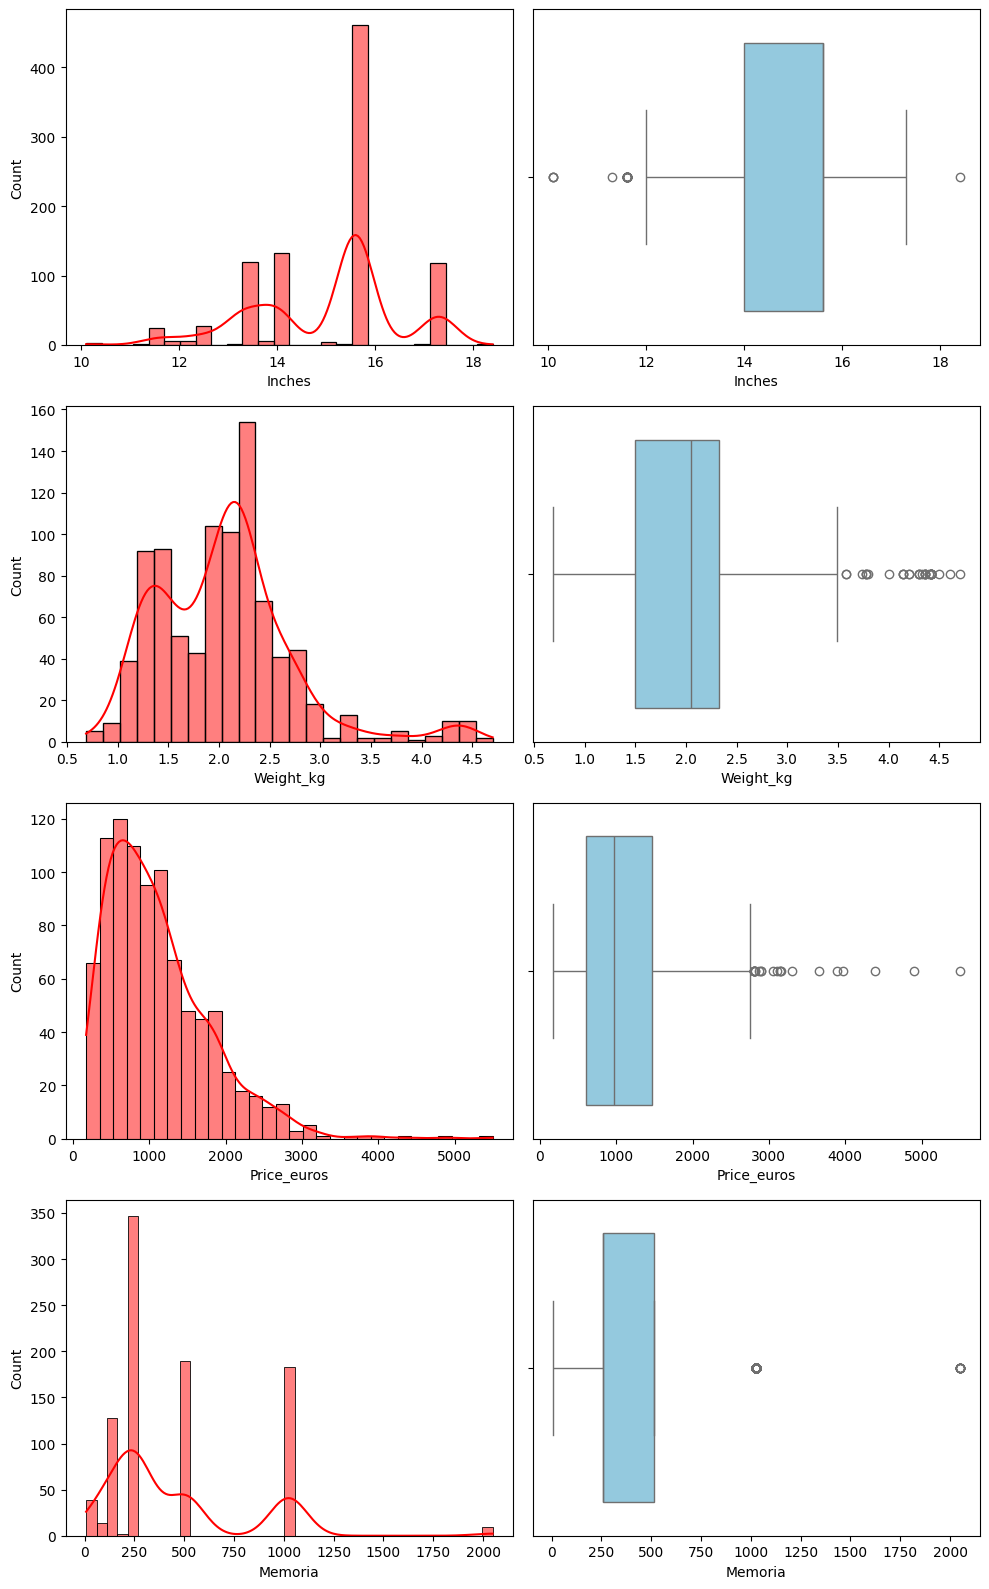

In [743]:
# Seleccionar variables numericas
col_num = df.select_dtypes(include=["float64"]).columns

# Configuración del gráfico
n_rows = len(col_num)
fig, axes = plt.subplots(n_rows, 2, figsize=(10, 4 * n_rows))

# Si axes es 1D (en caso de solo 1 fila), lo convierte en 2D
if n_rows == 1:
    axes = axes.reshape(1, 2)

# Graficar para cada columna numérica
for idx, column in enumerate(col_num):
    # Histograma
    sns.histplot(df[column], kde=True, ax=axes[idx, 0], color='red')
       
   
    # Boxplot horizontal
    sns.boxplot(x=df[column], ax=axes[idx, 1], color='skyblue')
  

# Ajuste
plt.tight_layout()
plt.show();



In [744]:
df.describe()

,laptop_ID,Inches,Ram_GB,Weight_kg,Price_euros,Memoria
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,663.118421,15.007785,8.377193,2.045422,1111.262533,450.741228
std,380.713558,1.454677,5.144482,0.673665,682.109694,365.842784
min,1.000000,10.100000,2.000000,0.690000,174.000000,8.000000
25%,339.750000,14.000000,4.000000,1.500000,598.742500,256.000000
50%,666.500000,15.600000,8.000000,2.050000,977.000000,256.000000
75%,985.250000,15.600000,8.000000,2.330000,1472.650000,512.000000
max,1320.000000,18.400000,64.000000,4.700000,5499.000000,2048.000000


## Categóricas

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   laptop_ID          912 non-null    int64   
 1   Company            912 non-null    category
 2   Product            912 non-null    category
 3   TypeName           912 non-null    category
 4   Inches             912 non-null    float64 
 5   Ram_GB             912 non-null    int64   
 6   OpSys              912 non-null    category
 7   Weight_kg          912 non-null    float64 
 8   Price_euros        912 non-null    float64 
 9   Resolución         912 non-null    object  
 10  tipo_pantalla      912 non-null    object  
 11  Memoria            912 non-null    float64 
 12  Tipos_Memoria      912 non-null    object  
 13  tipo_cpu           912 non-null    object  
 14  velocidad_cpu_ghz  912 non-null    object  
 15  marca_gpu          912 non-null    object  
 16  modelo_g

In [751]:
# Convertir los object en categoricas 
text_columns1 = ['Resolución', 'tipo_pantalla', 'Tipos_Memoria', 
                'velocidad_cpu_ghz', 'marca_gpu','modelo_gpu','OpSys_general','Company','Product','TypeName','OpSys','OpSys_general']

for col in text_columns1:
    df[col] = df[col].astype('category')

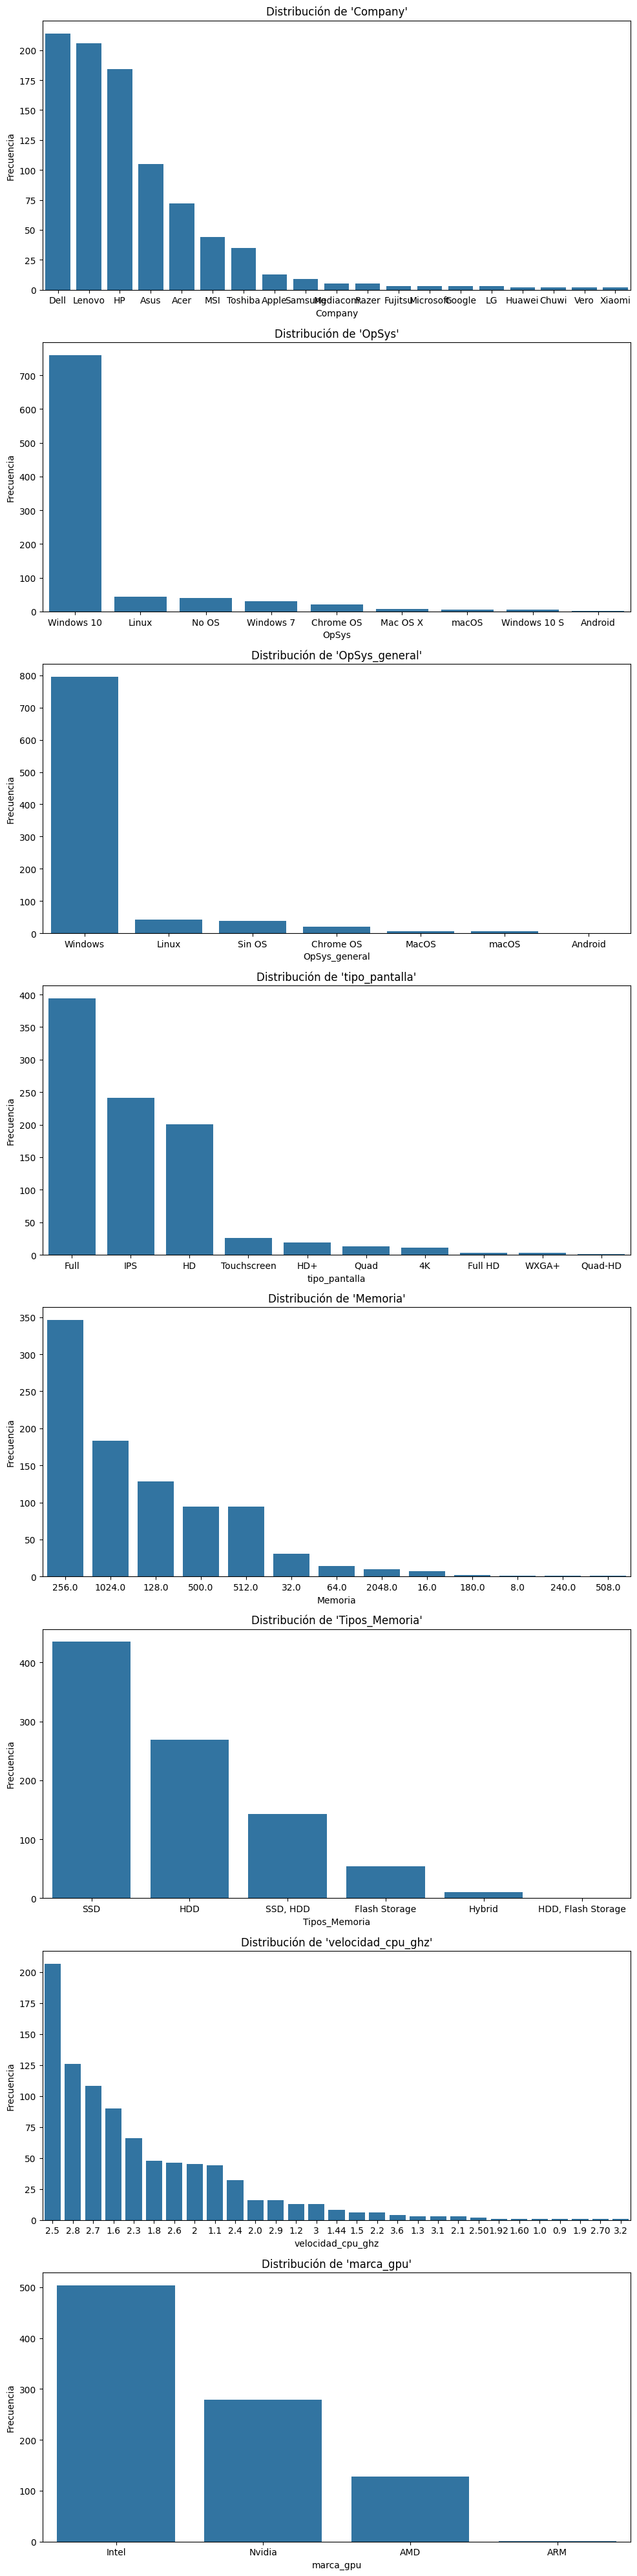

In [759]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que esta lista contiene los nombres de las columnas categóricas de tu DataFrame
categorical_columns = ['Company','OpSys','OpSys_general','tipo_pantalla','Memoria','Tipos_Memoria','velocidad_cpu_ghz','marca_gpu']  # Reemplaza con tus columnas categóricas

# Crear un subplot por cada columna categórica
plt.figure(figsize=(10, 5 * len(categorical_columns)))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f"Distribución de '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()
